In [14]:
# Import necessary libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import mediapipe as mp


In [15]:
# Helper function to visualize images with bounding boxes and landmarks
def visualize_results(image, boxes, landmarks):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    
    for box, landmark in zip(boxes, landmarks):
        # Draw bounding box
        (x, y, w, h) = box
        rect = plt.Rectangle((x, y), w - x, h - y, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
        # Draw landmarks
        for (lx, ly) in landmark:
            plt.plot(lx, ly, 'bo', markersize=5)
    
    plt.show()


In [16]:
# Step 1: Data Preparation
def prepare_data(image_dir):
    images = []
    labels = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.png'):
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path)
            images.append(cv2.resize(image, (224, 224)))  # Resize for SSD input
            labels.append([0, 0, 224, 224])  # Placeholder for bounding boxes
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels


In [17]:
# Step 2: Train SSD Model
def train_ssd_model(train_images, train_labels):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(4, activation='sigmoid')(x)
    
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(train_images, train_labels, epochs=10, batch_size=32)
    
    return model


In [18]:
# Step 3: Pose Estimation using Mediapipe
def detect_landmarks(image, mp_face_mesh):
    # Convert the image to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = mp_face_mesh.process(rgb_image)
    
    landmarks = []
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            landmarks.append([(lm.x * image.shape[1], lm.y * image.shape[0]) for lm in face_landmarks.landmark])
    
    return landmarks


In [19]:
# Function to detect faces using SSD model (Placeholder Implementation)
def detect_faces_ssd(model, image):
    # Resize image for SSD model
    resized_image = cv2.resize(image, (224, 224))
    input_image = np.expand_dims(resized_image, axis=0) / 255.0  # Normalize

    # Predict bounding boxes
    predictions = model.predict(input_image)[0]
    
    # Placeholder bounding box (assuming predictions are in (x, y, w, h) format)
    boxes = [(0, 0, 224, 224)]  # Replace with actual detection logic
    
    # Convert back to original image size
    boxes = [(int(x * image.shape[1] / 224), int(y * image.shape[0] / 224),
              int(w * image.shape[1] / 224), int(h * image.shape[0] / 224)) for (x, y, w, h) in boxes]
    
    return boxes


In [ ]:
# Initialize Mediapipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh.FaceMesh()

# Prepare data
image_dir = r'C:\Users\khand\OneDrive\Desktop\ogmen_robotics\train'
train_images, train_labels = prepare_data(image_dir)

# Train the model (this is a placeholder; ensure you have a proper SSD implementation)
model = train_ssd_model(train_images, train_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step


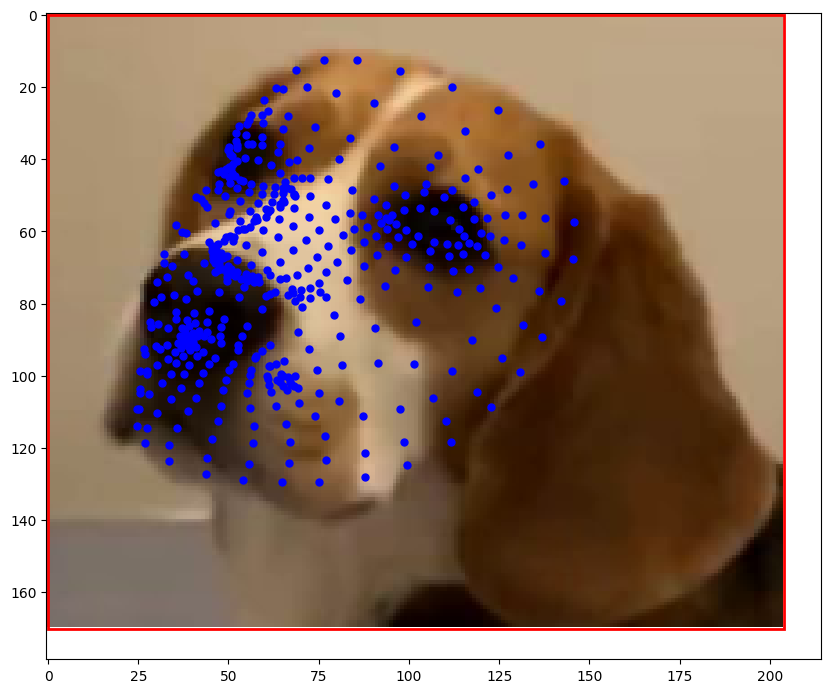

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


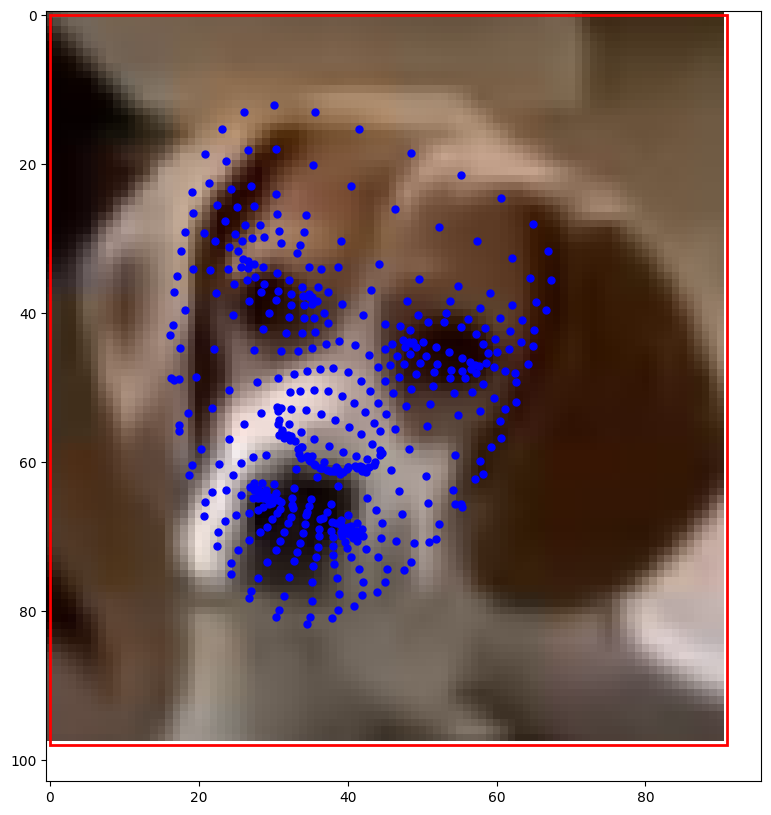

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


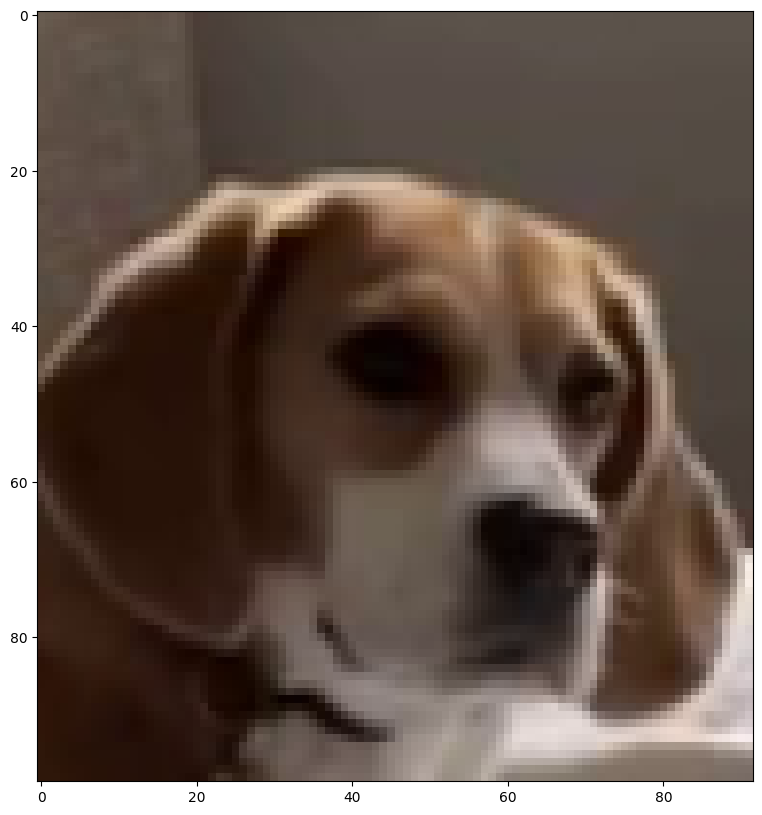

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


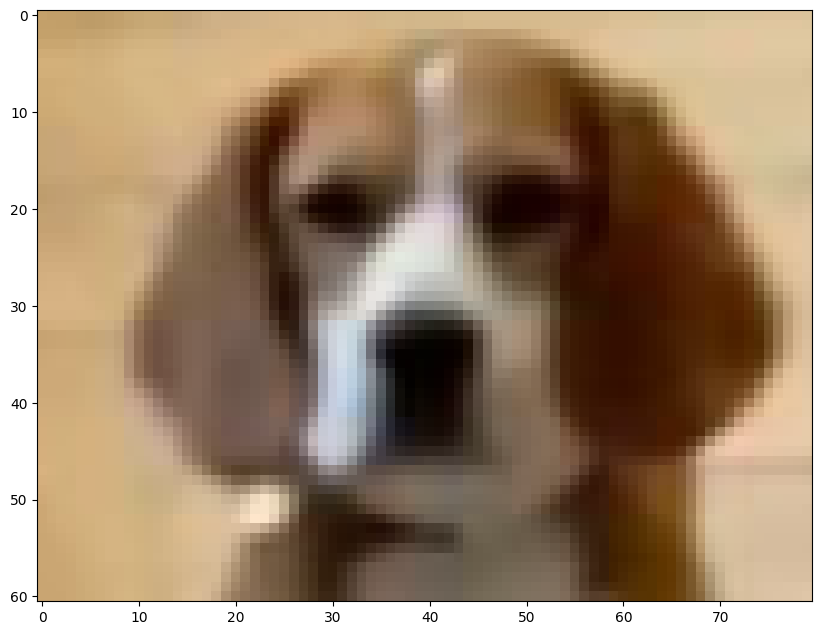

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


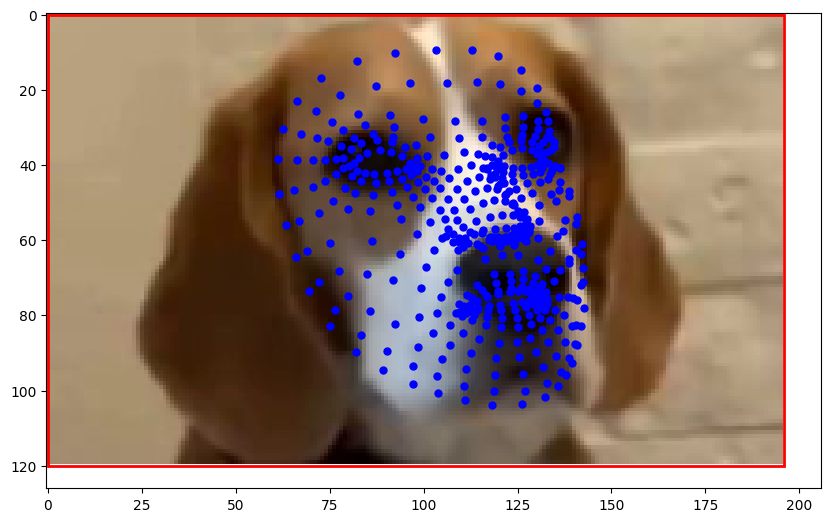

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


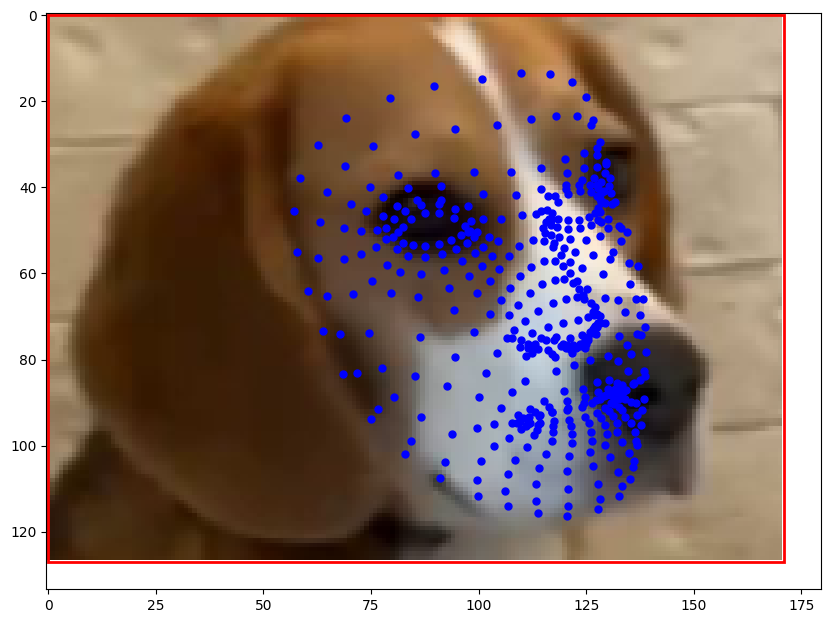

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


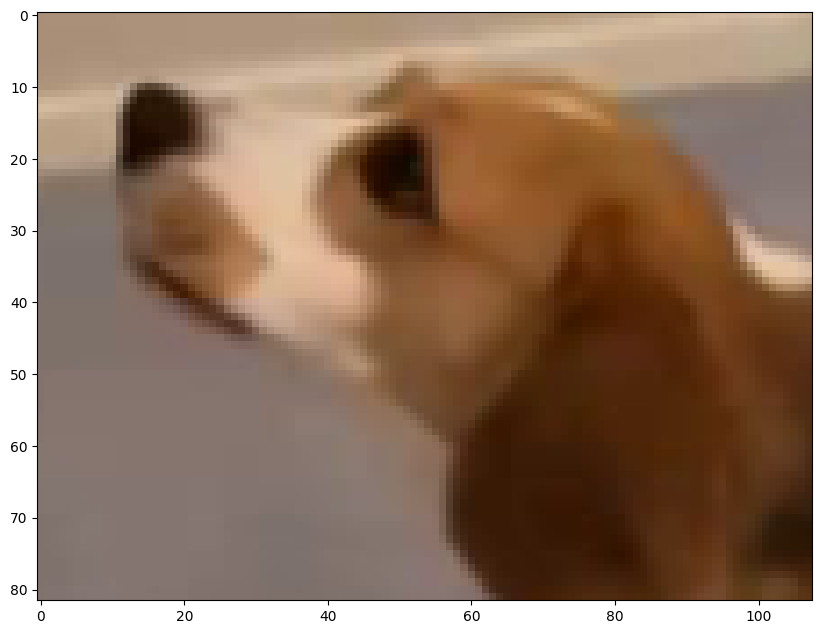

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


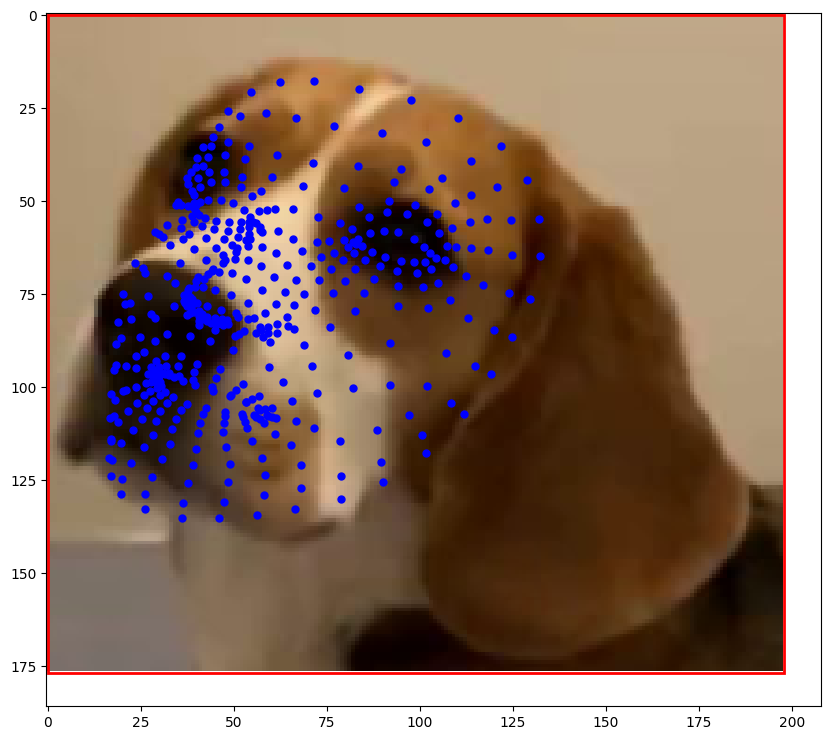

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


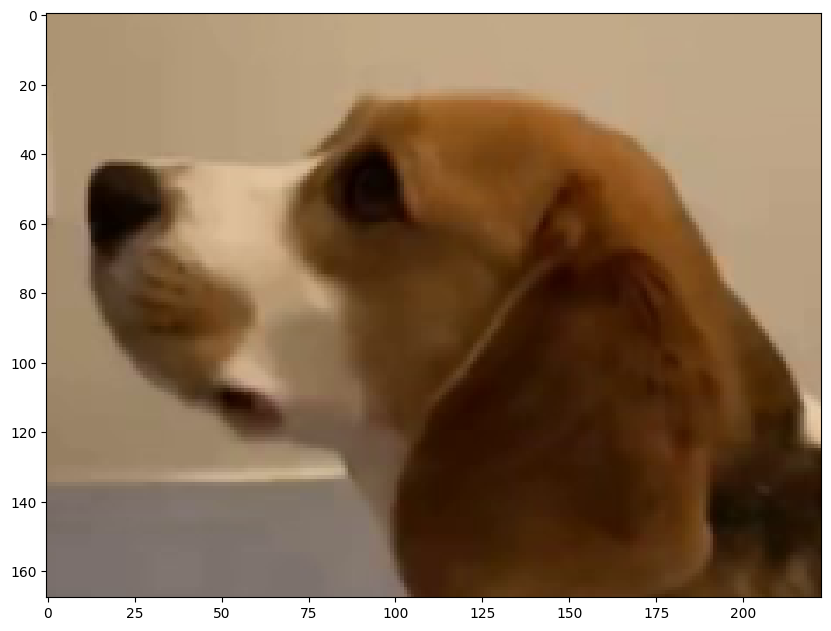

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


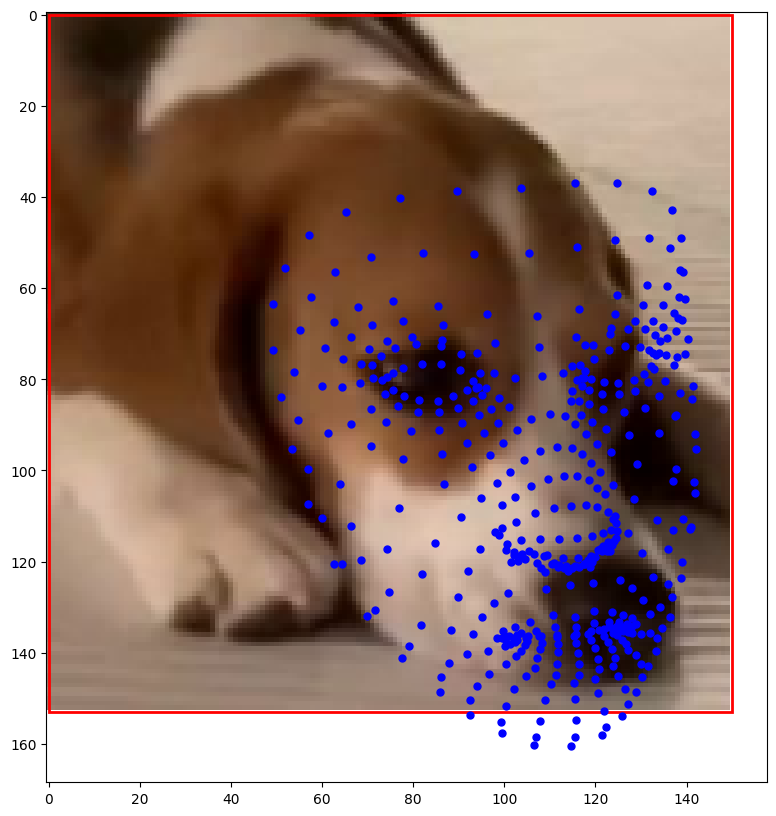

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


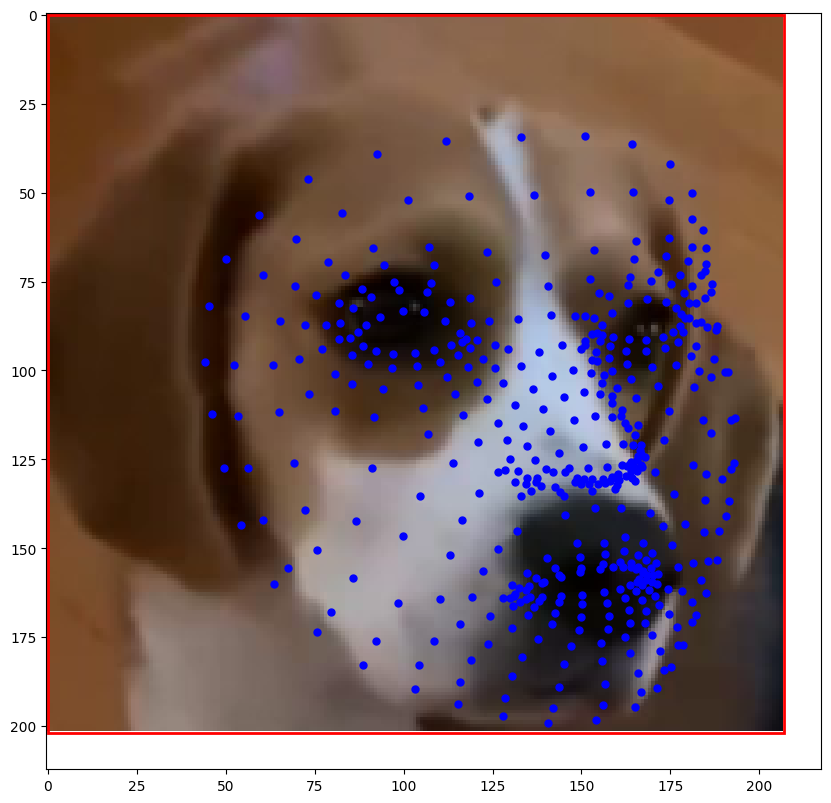

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


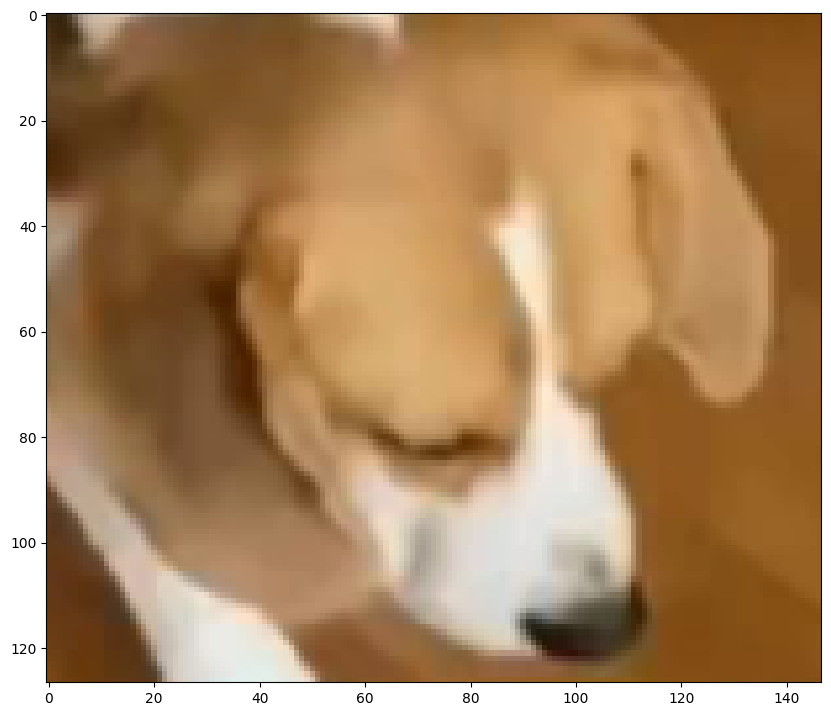

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


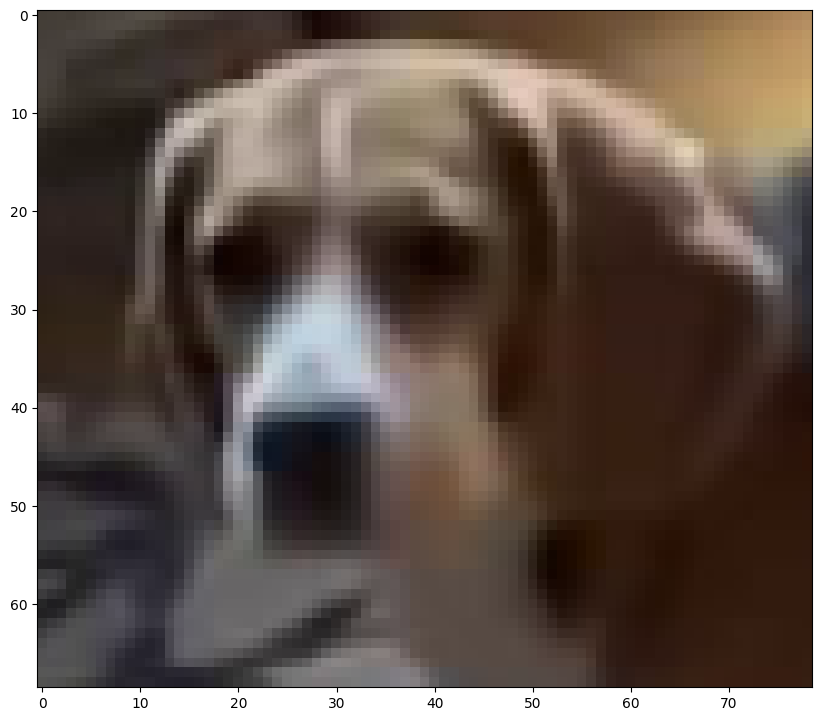

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


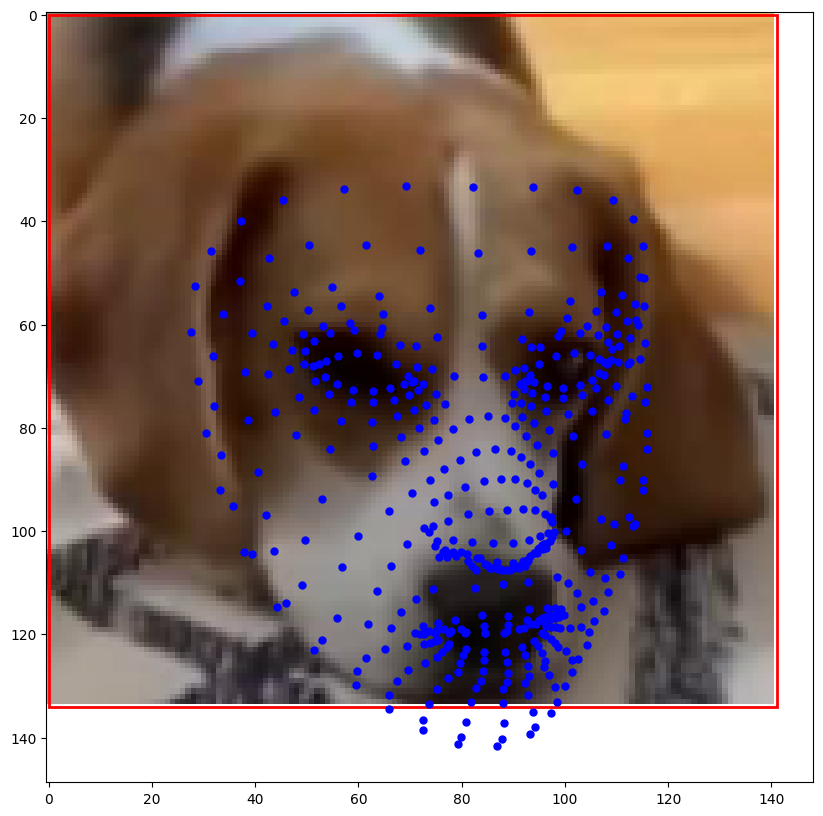

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


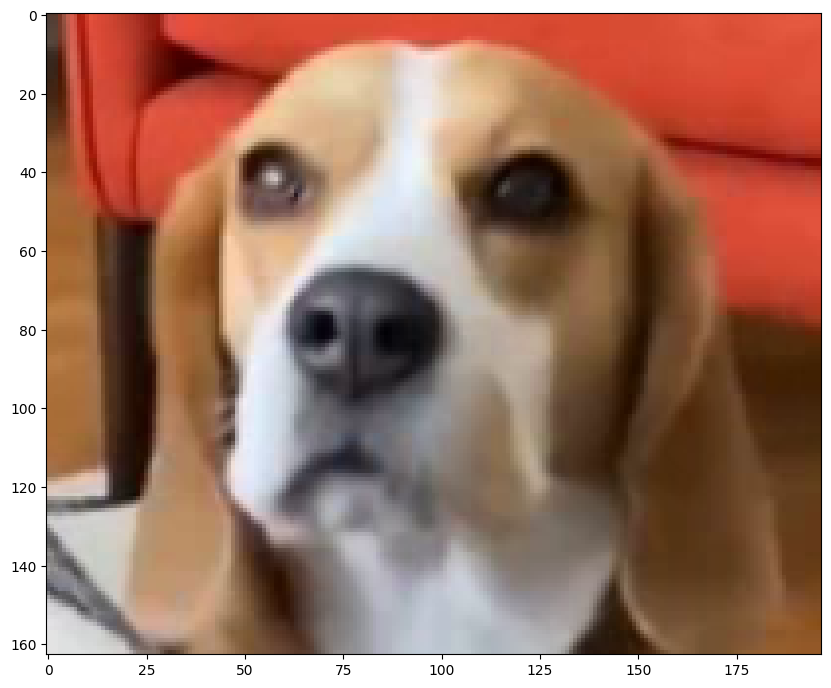

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


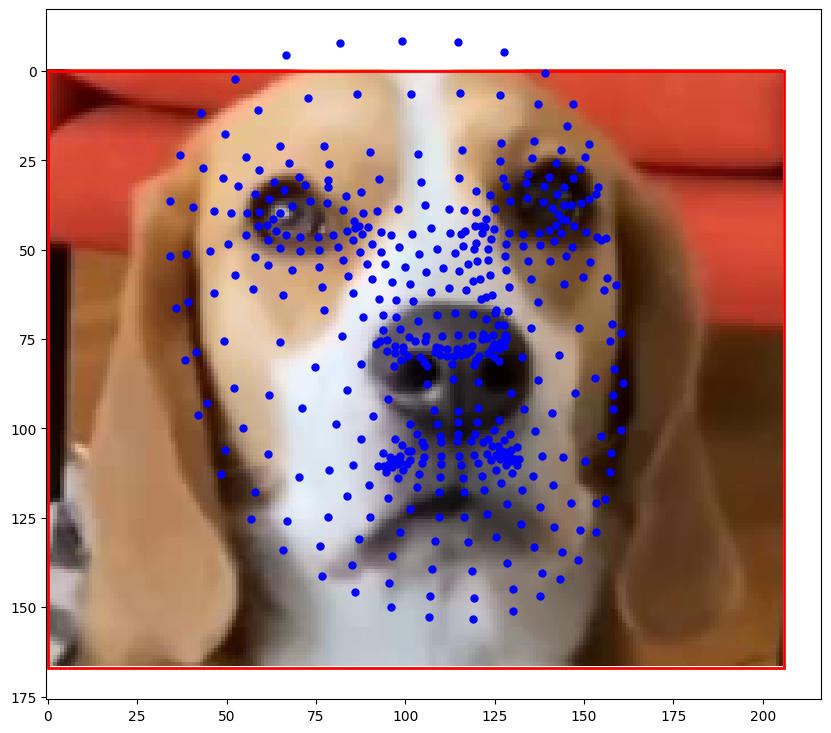

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


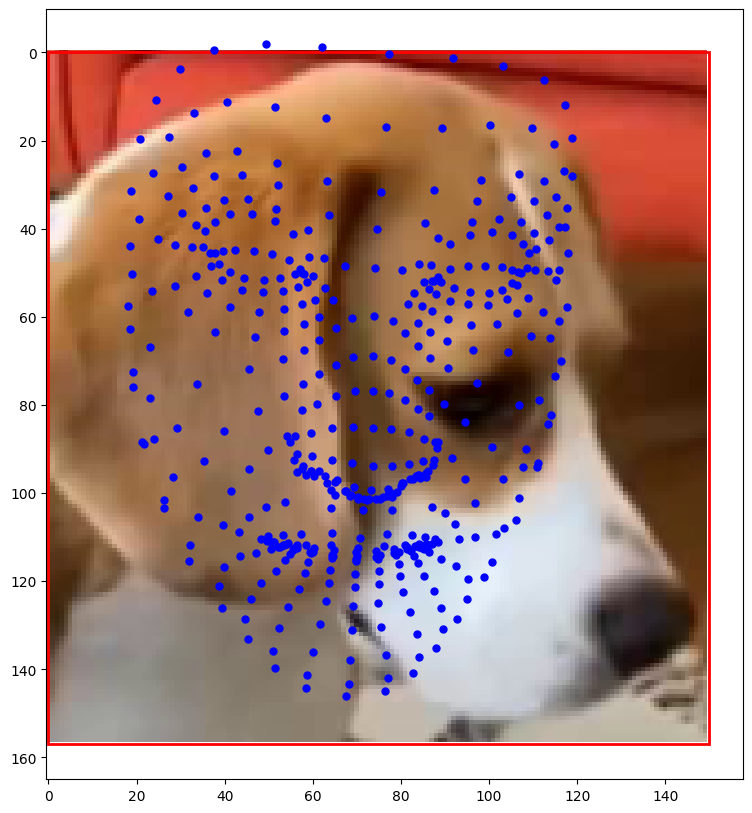

In [21]:
# Process all images in the folder
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        image = cv2.imread(image_path)

        # Detect dog faces using SSD model
        boxes = detect_faces_ssd(model, image)
        
        # Detect landmarks on each detected face
        landmarks = []
        for box in boxes:
            x, y, w, h = box
            face_image = image[y:h, x:w]
            detected_landmarks = detect_landmarks(face_image, mp_face_mesh)
            landmarks.extend(detected_landmarks)
        
        # Draw bounding boxes and landmarks on the original image
        visualize_results(image, boxes, landmarks)
